In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from PR import *
import matplotlib.pyplot as plt

In [2]:
def plotDataset(dataset):
    x0 = []
    y0 = []
    x1 =[]
    y1 =[]    
    for i in range(dataset[0].shape[0]):
        if dataset[1][i] == 0:
            x0.append(dataset[0][i][0])
            y0.append(dataset[0][i][1])
        if dataset[1][i] == 1:
            x1.append(dataset[0][i][0])
            y1.append(dataset[0][i][1])
    plt.plot(x0, y0, 'o', color='red')
    plt.plot(x1, y1, 'o', color='blue')

In [35]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=2, n_clusters_per_class=1,
                           n_samples=10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

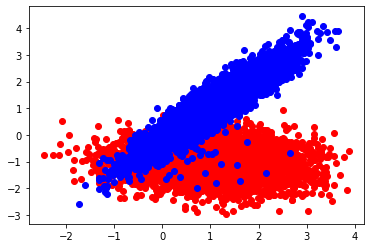

In [36]:
plotDataset((X,y))

In [37]:
model = KNeighborsClassifier(n_neighbors=3)
#model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
model.fit(X_train, y_train)
probe_predicts = model.predict_proba(X_test)

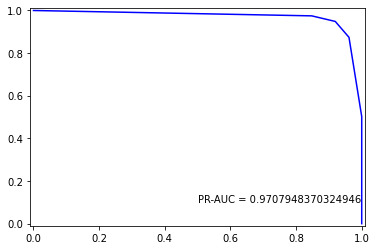

In [38]:
%matplotlib inline
pr(probe_predicts, y_test)

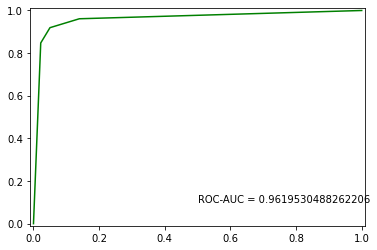

In [39]:
roc(probe_predicts, y_test)

In [8]:
def getIdealData():
    ones = np.full((1000,2),fill_value=[1.0, 0.0], dtype = object)
    zeroes = np.full((1000,2),fill_value=[0.0, 1.0], dtype = object)
    zo = np.concatenate((ones,zeroes), axis = 0)
    np.random.shuffle(zo)
    return zo
idata = getIdealData()

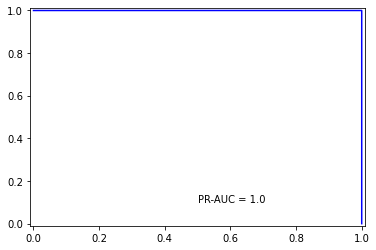

In [9]:
pr(idata,idata[:,1])

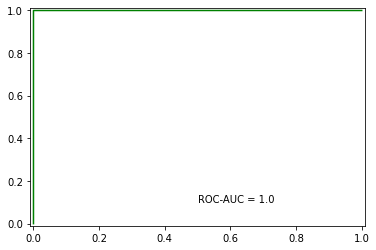

In [10]:
roc(idata,idata[:,1])